In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('training_file_data/final_file.csv')
df.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-1201,3045.98,2544.85,2253.3444,1873.8678,1.1691,100.0,94.9722,0.1210,1.4752,...,NaN,0.4948,0.0123,0.0033,2.4804,0.0291,0.0102,0.0033,35.0279,-1
1,Wafer-1202,3151.98,2563.75,2175.2556,1022.1660,1.2833,100.0,100.6222,0.1250,1.4536,...,NaN,0.5063,0.0113,0.0031,2.2284,0.0291,0.0102,0.0033,35.0279,-1
2,Wafer-1203,3071.18,2489.86,2195.3000,1151.8233,0.9220,100.0,103.5467,0.1232,1.4826,...,NaN,0.5033,0.0112,0.0029,2.2320,0.0291,0.0102,0.0033,35.0279,-1
3,Wafer-1204,2958.46,2523.78,2171.8556,1156.6018,1.4025,100.0,100.1367,0.1243,1.4645,...,NaN,0.4954,0.0136,0.0033,2.7511,0.0291,0.0102,0.0033,35.0279,-1
4,Wafer-1205,3196.21,2413.39,2255.5222,1763.0739,1.2226,100.0,101.5878,0.1200,1.4845,...,353.8319,0.5058,0.0094,0.0026,1.8673,0.0053,0.0188,0.0057,353.8319,-1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Columns: 592 entries, Unnamed: 0 to Good/Bad
dtypes: float64(590), int64(1), object(1)
memory usage: 3.8+ MB


#### Drop unwanted columns

In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

#### Drop Dublicate Values in dataset

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(837, 591)

####  Drop Zero std features

In [7]:
zero_std_columns =[]
for column in df.columns:
    if df[column].std()==0:
        zero_std_columns.append(column)
zero_std_columns        

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Sensor-374',
 'Sensor-375',
 'Sensor-376',
 'Sensor-379',
 'Sensor-380',
 'Sensor-381',
 'Sensor-382',
 'S

In [8]:
df.drop(columns=zero_std_columns,inplace=True)

In [9]:
df.shape

(837, 475)

##### Note: Implemement DataDrift tech for may be change in these distribution in  

#### Dealing with NAN Values 

In [10]:
df.columns[df.isnull().sum()>0]

Index(['Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4', 'Sensor-5', 'Sensor-7',
       'Sensor-8', 'Sensor-9', 'Sensor-10', 'Sensor-11',
       ...
       'Sensor-565', 'Sensor-566', 'Sensor-567', 'Sensor-568', 'Sensor-569',
       'Sensor-570', 'Sensor-579', 'Sensor-580', 'Sensor-581', 'Sensor-582'],
      dtype='object', length=339)

##### Inight:
1. Total 339 columns contains NAN Values

##### check more 50% NAN values in dataset

In [11]:
higher_nan_column = df.columns[df.isnull().mean()*100>50]
higher_nan_column

Index(['Sensor-73', 'Sensor-74', 'Sensor-86', 'Sensor-113', 'Sensor-158',
       'Sensor-159', 'Sensor-221', 'Sensor-248', 'Sensor-293', 'Sensor-294',
       'Sensor-346', 'Sensor-347', 'Sensor-359', 'Sensor-386', 'Sensor-493',
       'Sensor-520', 'Sensor-579', 'Sensor-580', 'Sensor-581', 'Sensor-582'],
      dtype='object')

##### Check These features are important or not 

In [13]:
higher_nan_column = higher_nan_column.to_list()
higher_nan_column.append('Good/Bad')

In [61]:
df.columns

Index(['Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4', 'Sensor-5', 'Sensor-7',
       'Sensor-8', 'Sensor-9', 'Sensor-10', 'Sensor-11',
       ...
       'Sensor-582', 'Sensor-583', 'Sensor-584', 'Sensor-585', 'Sensor-586',
       'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590', 'Good/Bad'],
      dtype='object', length=475)

In [14]:
d1 = df[higher_nan_column].corr()['Good/Bad']
d1

Sensor-73     0.008700
Sensor-74    -0.009180
Sensor-86    -0.103559
Sensor-113    0.035889
Sensor-158    0.027671
Sensor-159    0.165347
Sensor-221   -0.055341
Sensor-248    0.072994
Sensor-293    0.072964
Sensor-294    0.170492
Sensor-346    0.007212
Sensor-347   -0.006983
Sensor-359   -0.008987
Sensor-386    0.046501
Sensor-493   -0.045120
Sensor-520    0.045943
Sensor-579    0.015144
Sensor-580   -0.031697
Sensor-581   -0.034970
Sensor-582   -0.088950
Good/Bad      1.000000
Name: Good/Bad, dtype: float64

##### Insight:
1.

In [22]:
from sklearn.impute import KNNImputer

def nan_imputer_knn(df):
    # Define KNN imputer
    knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')  # You can adjust the number of neighbors
    
    # Apply KNN imputation
    knn_imputed_data = knn_imputer.fit_transform(df)
    
    # Convert back to DataFrame
    knn_imputed_df = pd.DataFrame(knn_imputed_data, columns=df.columns)
    
    return knn_imputed_df


In [16]:
d2 = knn_imputed_df[higher_nan_column].corr()['Good/Bad']

In [17]:
d1 = pd.DataFrame(d1).rename(columns={'Good/Bad':'Corr_with_Good/Bad'})
d2 = pd.DataFrame(d2).rename(columns={'Good/Bad':'Corr_with_Knn_Good/Bad'})


In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
def nan_imputer_mice(df):
    # Define MICE imputer
    mice_imputer = IterativeImputer(max_iter=10, random_state=0)  # You can adjust iterations and random_state
    
    # Apply MICE imputation
    mice_imputed_data = mice_imputer.fit_transform(df)
    
    # Convert back to DataFrame
    mice_imputed_df = pd.DataFrame(mice_imputed_data, columns=df.columns)
    
    return mice_imputed_df

In [20]:
d3 = mice_imputed_df[higher_nan_column].corr()['Good/Bad']

In [23]:
from lightgbm import LGBMRegressor
def nan_imputer_lightbm(data):
    for col in data.columns:
        if df[col].isnull().sum()>0:
            print(col)
            nan_idxs = np.where(data[col].isna())[0]
            # print(nan_idxs)
            data['is_nan']=0
            print(data['is_nan'].value_counts())
            data.loc[nan_idxs,'is_nan'] = 1
            print(data['is_nan'].value_counts())
            train_df = data[data['is_nan']==0]
            print(train_df.shape)
            test_df = data[data['is_nan']==1]
            print(test_df.shape)
            # break
            X_train = train_df.drop(columns=[col,'is_nan'])
            y_train = train_df[col]
            x_test = test_df.drop(columns=[col,'is_nan'])
        
            model = LGBMRegressor()
            model.fit(X_train,y_train)
            print(type(x_test))
            x_test_array = np.array(x_test)
            y_pred= model.predict(x_test_array)
        
            data.loc[nan_idxs,col]= y_pred
            print(data[col].isnull().sum())

    return data
    

In [22]:
d4 = data[higher_nan_column].corr()['Good/Bad']
d4

Sensor-73    -0.033766
Sensor-74    -0.036010
Sensor-86     0.005835
Sensor-113   -0.021201
Sensor-158   -0.010799
Sensor-159    0.026000
Sensor-221   -0.023568
Sensor-248    0.021226
Sensor-293   -0.000041
Sensor-294    0.023132
Sensor-346    0.030760
Sensor-347    0.000250
Sensor-359   -0.017880
Sensor-386    0.003854
Sensor-493   -0.021886
Sensor-520   -0.007909
Sensor-579    0.023924
Sensor-580   -0.013228
Sensor-581   -0.020292
Sensor-582   -0.063919
Good/Bad      1.000000
Name: Good/Bad, dtype: float64

In [25]:
d1 = pd.DataFrame(d1).rename(columns={'Good/Bad':'Corr_with_Good/Bad'})
d2 = pd.DataFrame(d2).rename(columns={'Good/Bad':'Corr_with_Knn_Good/Bad'})
d3 = pd.DataFrame(d3).rename(columns={'Good/Bad':'Corr_with_MICE_Good/Bad'})
d4 = pd.DataFrame(d4).rename(columns={'Good/Bad':'Corr_with_LightGBM_Good/Bad'})
pd.concat([d1, d2, d3, d4], axis=1)

,Corr_with_Good/Bad,Corr_with_Knn_Good/Bad,Corr_with_MICE_Good/Bad,Corr_with_LightGBM_Good/Bad
Sensor-73,0.008700,-0.015184,-0.041722,-0.033766
Sensor-74,-0.009180,-0.002034,-0.005459,-0.036010
Sensor-86,-0.103559,-0.029363,0.002770,0.005835
Sensor-113,0.035889,0.012256,0.020490,-0.021201
Sensor-158,0.027671,0.017072,-0.021643,-0.010799
Sensor-159,0.165347,0.002760,0.042641,0.026000
Sensor-221,-0.055341,-0.031285,0.000330,-0.023568
Sensor-248,0.072994,0.033763,0.025458,0.021226
Sensor-293,0.072964,0.026253,-0.021613,-0.000041
Sensor-294,0.170492,0.002795,0.041769,0.023132


##### Insights:
1. Remove more 50% NAN values present in column remove is better after trying difference types of NaN Inputer It can't show any improvement relation with target variable.

2. Upto now LightGBM work well comparing with other imputation methods


In [23]:
higher_nan_column=['Sensor-73',
 'Sensor-74',
 'Sensor-86',
 'Sensor-113',
 'Sensor-158',
 'Sensor-159',
 'Sensor-221',
 'Sensor-248',
 'Sensor-293',
 'Sensor-294',
 'Sensor-346',
 'Sensor-347',
 'Sensor-359',
 'Sensor-386',
 'Sensor-493',
 'Sensor-520',
 'Sensor-579',
 'Sensor-580',
 'Sensor-581',
 'Sensor-582',]

In [24]:
df.drop(columns=higher_nan_column,inplace=True)
knn_imputed_df.drop(columns=higher_nan_column,inplace=True)
mice_imputed_df.drop(columns=higher_nan_column,inplace=True)
data.drop(columns=higher_nan_column,inplace=True)

In [28]:
def check_nan_values(df):
    return f'NAN values contains Columns : {len(df.columns[df.isnull().sum()>0])}'

In [29]:
check_nan_values(knn_imputed_df)

'NAN values contains Columns : 0'

In [30]:
check_nan_values(mice_imputed_df)

'NAN values contains Columns : 0'

In [31]:
check_nan_values(data)

'NAN values contains Columns : 0'

#### Check Outliers and Skewness of features

In [49]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
def find_outliers(df):
    z_scores = np.abs(zscore(df))
    
    
    
    # Identify outliers (Z-score > 3)
    outliers = (z_scores > 3)
    
    # Count the number of outliers for each feature
    outliers_count = pd.DataFrame(outliers, columns=df.columns).sum()
    # print(outliers_count[outliers_count > 0])
    
    outliers_df = pd.DataFrame(outliers_count[outliers_count>0].sort_values(ascending=False)).reset_index()
    outliers_df.columns = ['index','outliers_count']
    # sns.histplot(outliers_df)
    # plt.show()
    print(f'Total number of columns Outliers Contains: {len(list(outliers_df['index']))}')
    # return list(outliers_df['index'])


In [65]:
outiers_in_df = find_outliers(df)
outlirs_in_knn_imputed_df = find_outliers(knn_imputed_df)
outlirs_in_mice_imputed_df = find_outliers(mice_imputed_df)
outlirs_in_lightbgm_df = find_outliers(data)

In [90]:
def concat_df(df1,df2,df3,df4):
    top_20_in_df1 = df1.head(20)
    top_20_in_df2 = df2.head(20)
    top_20_in_df3 = df3.head(20)
    top_20_in_df4 = df4.head(20)
    return pd.concat([top_20_in_df1,top_20_in_df2,top_20_in_df3,top_20_in_df4],axis=1)

Text(0.5, 1.0, 'original_df')

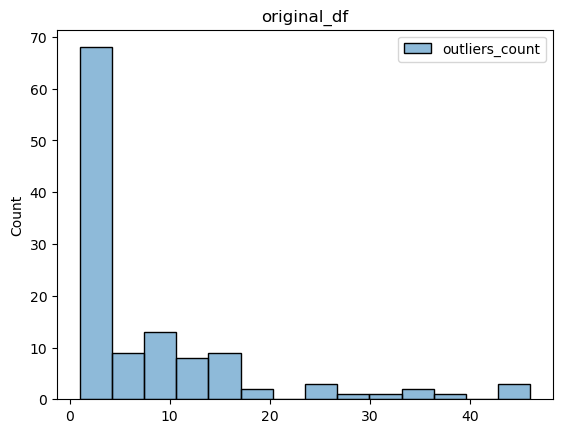

In [111]:
outiers_in_df.columns = ['index','outliers_count']
sns.histplot(outiers_in_df)
plt.title('original_df')


Text(0.5, 1.0, 'outlirs_in_knn_imputed_df')

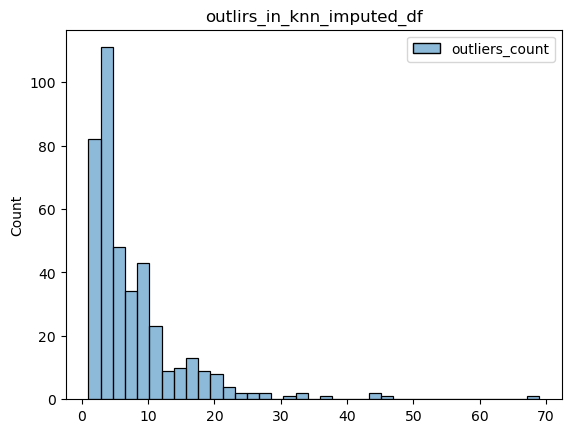

In [110]:

outlirs_in_knn_imputed_df.columns = ['index','outliers_count']
sns.histplot(outlirs_in_knn_imputed_df)
plt.title('outlirs_in_knn_imputed_df')

Text(0.5, 1.0, 'outlirs_in_mice_imputed_df')

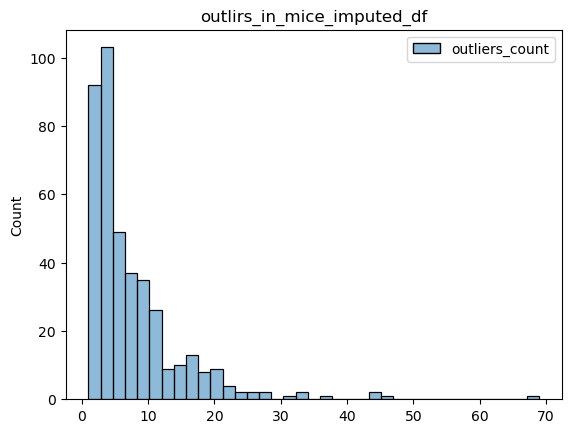

In [113]:
outlirs_in_mice_imputed_df.columns = ['index','outliers_count']
sns.histplot(outlirs_in_mice_imputed_df)
plt.title('outlirs_in_mice_imputed_df')

Text(0.5, 1.0, 'outlirs_in_lightbgm_df')

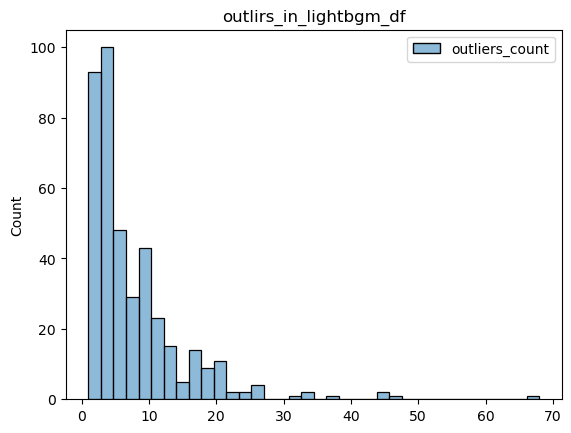

In [114]:
outlirs_in_lightbgm_df.columns = ['index','outliers_count']
sns.histplot(outlirs_in_lightbgm_df)
plt.title('outlirs_in_lightbgm_df')

#### check after remove columns NAN more than 50%. re imputer nan values using knn,mice,lightgbm

In [12]:
df.head()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,3045.98,2544.85,2253.3444,1873.8678,1.1691,94.9722,0.1210,1.4752,0.0084,0.0009,...,NaN,0.4948,0.0123,0.0033,2.4804,0.0291,0.0102,0.0033,35.0279,-1
1,3151.98,2563.75,2175.2556,1022.1660,1.2833,100.6222,0.1250,1.4536,-0.0110,-0.0035,...,NaN,0.5063,0.0113,0.0031,2.2284,0.0291,0.0102,0.0033,35.0279,-1
2,3071.18,2489.86,2195.3000,1151.8233,0.9220,103.5467,0.1232,1.4826,0.0136,0.0009,...,NaN,0.5033,0.0112,0.0029,2.2320,0.0291,0.0102,0.0033,35.0279,-1
3,2958.46,2523.78,2171.8556,1156.6018,1.4025,100.1367,0.1243,1.4645,0.0001,0.0067,...,NaN,0.4954,0.0136,0.0033,2.7511,0.0291,0.0102,0.0033,35.0279,-1
4,3196.21,2413.39,2255.5222,1763.0739,1.2226,101.5878,0.1200,1.4845,-0.0037,0.0049,...,353.8319,0.5058,0.0094,0.0026,1.8673,0.0053,0.0188,0.0057,353.8319,-1


In [41]:
df_exp = df.copy()

In [15]:
higher_nan_column

Index(['Sensor-73', 'Sensor-74', 'Sensor-86', 'Sensor-113', 'Sensor-158',
       'Sensor-159', 'Sensor-221', 'Sensor-248', 'Sensor-293', 'Sensor-294',
       'Sensor-346', 'Sensor-347', 'Sensor-359', 'Sensor-386', 'Sensor-493',
       'Sensor-520', 'Sensor-579', 'Sensor-580', 'Sensor-581', 'Sensor-582'],
      dtype='object')

In [16]:
df.drop(columns=higher_nan_column,inplace=True)

In [17]:
df.shape

(837, 455)

In [39]:
df_exp.drop(columns=higher_nan_column,inplace=True)

KeyError: "['Sensor-73', 'Sensor-74', 'Sensor-86', 'Sensor-113', 'Sensor-158', 'Sensor-159', 'Sensor-221', 'Sensor-248', 'Sensor-293', 'Sensor-294', 'Sensor-346', 'Sensor-347', 'Sensor-359', 'Sensor-386', 'Sensor-493', 'Sensor-520', 'Sensor-579', 'Sensor-580', 'Sensor-581', 'Sensor-582'] not found in axis"

In [42]:
df_exp.shape

(837, 455)

In [24]:
imputers = [nan_imputer_knn,nan_imputer_mice,nan_imputer_lightbm]
imputers

[<function __main__.nan_imputer_knn(df)>,
 <function __main__.nan_imputer_mice(df)>,
 <function __main__.nan_imputer_lightbm(data)>]

In [35]:
for imputer in imputers:
    imputer_name = "data_"+imputer.__name__
    print(imputer_name)


data_nan_imputer_knn
data_nan_imputer_mice
data_nan_imputer_lightbm


In [43]:
data_nan_imputer_knn= nan_imputer_knn(df_exp)
data_nan_imputer_knn

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-578,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,3045.98,2544.85,2253.3444,1873.8678,1.1691,94.9722,0.1210,1.4752,0.0084,0.0009,...,13.5037,0.4948,0.0123,0.0033,2.4804,0.0291,0.0102,0.0033,35.0279,-1.0
1,3151.98,2563.75,2175.2556,1022.1660,1.2833,100.6222,0.1250,1.4536,-0.0110,-0.0035,...,9.3630,0.5063,0.0113,0.0031,2.2284,0.0291,0.0102,0.0033,35.0279,-1.0
2,3071.18,2489.86,2195.3000,1151.8233,0.9220,103.5467,0.1232,1.4826,0.0136,0.0009,...,13.5037,0.5033,0.0112,0.0029,2.2320,0.0291,0.0102,0.0033,35.0279,-1.0
3,2958.46,2523.78,2171.8556,1156.6018,1.4025,100.1367,0.1243,1.4645,0.0001,0.0067,...,13.5037,0.4954,0.0136,0.0033,2.7511,0.0291,0.0102,0.0033,35.0279,-1.0
4,3196.21,2413.39,2255.5222,1763.0739,1.2226,101.5878,0.1200,1.4845,-0.0037,0.0049,...,56.7640,0.5058,0.0094,0.0026,1.8673,0.0053,0.0188,0.0057,353.8319,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,3169.00,2265.60,2187.9889,1096.3790,0.9065,97.6567,0.1221,1.4109,-0.0239,-0.0121,...,67.4386,0.4912,0.0127,0.0039,2.5801,0.0166,0.0122,0.0036,73.6335,-1.0
833,2923.19,2516.40,2180.8889,1084.7221,0.9085,94.2467,0.1226,1.3137,0.0345,-0.0137,...,8.2645,0.4939,0.0163,0.0037,3.2914,0.0166,0.0122,0.0036,73.6335,-1.0
834,3003.43,2448.34,2205.5000,1287.3538,2.3842,111.7644,0.1241,1.4339,0.0020,-0.0036,...,12.6938,0.4966,0.0084,0.0020,1.6866,0.0166,0.0122,0.0036,73.6335,-1.0
835,2953.63,2500.05,2195.9778,1388.2869,1.5605,103.2400,0.1234,1.5177,0.0183,-0.0137,...,8.2886,0.5009,0.0135,0.0035,2.7038,0.0178,0.0305,0.0106,171.3183,-1.0


In [44]:
data_nan_imputer_mice = nan_imputer_mice(df_exp)
data_nan_imputer_mice

C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-578,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,3045.98,2544.85,2253.3444,1873.8678,1.1691,94.9722,0.1210,1.4752,0.0084,0.0009,...,13.5037,0.4948,0.0123,0.0033,2.4804,0.0291,0.0102,0.0033,35.0279,-1.0
1,3151.98,2563.75,2175.2556,1022.1660,1.2833,100.6222,0.1250,1.4536,-0.0110,-0.0035,...,9.3630,0.5063,0.0113,0.0031,2.2284,0.0291,0.0102,0.0033,35.0279,-1.0
2,3071.18,2489.86,2195.3000,1151.8233,0.9220,103.5467,0.1232,1.4826,0.0136,0.0009,...,13.5037,0.5033,0.0112,0.0029,2.2320,0.0291,0.0102,0.0033,35.0279,-1.0
3,2958.46,2523.78,2171.8556,1156.6018,1.4025,100.1367,0.1243,1.4645,0.0001,0.0067,...,13.5037,0.4954,0.0136,0.0033,2.7511,0.0291,0.0102,0.0033,35.0279,-1.0
4,3196.21,2413.39,2255.5222,1763.0739,1.2226,101.5878,0.1200,1.4845,-0.0037,0.0049,...,56.7640,0.5058,0.0094,0.0026,1.8673,0.0053,0.0188,0.0057,353.8319,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,3169.00,2265.60,2187.9889,1096.3790,0.9065,97.6567,0.1221,1.4109,-0.0239,-0.0121,...,67.4386,0.4912,0.0127,0.0039,2.5801,0.0166,0.0122,0.0036,73.6335,-1.0
833,2923.19,2516.40,2180.8889,1084.7221,0.9085,94.2467,0.1226,1.3137,0.0345,-0.0137,...,8.2645,0.4939,0.0163,0.0037,3.2914,0.0166,0.0122,0.0036,73.6335,-1.0
834,3003.43,2448.34,2205.5000,1287.3538,2.3842,111.7644,0.1241,1.4339,0.0020,-0.0036,...,12.6938,0.4966,0.0084,0.0020,1.6866,0.0166,0.0122,0.0036,73.6335,-1.0
835,2953.63,2500.05,2195.9778,1388.2869,1.5605,103.2400,0.1234,1.5177,0.0183,-0.0137,...,8.2886,0.5009,0.0135,0.0035,2.7038,0.0178,0.0305,0.0106,171.3183,-1.0


In [45]:
data_nan_imputer_lightbm = nan_imputer_lightbm(df_exp)
data_nan_imputer_lightbm

Sensor-1
is_nan
0    837
Name: count, dtype: int64
is_nan
0    836
1      1
Name: count, dtype: int64
(836, 456)
(1, 456)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90204
[LightGBM] [Info] Number of data points in the train set: 836, number of used features: 444
[LightGBM] [Info] Start training from score 3020.762559
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
<class '

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad,is_nan
0,3045.98,2544.85,2253.3444,1873.8678,1.1691,94.9722,0.1210,1.4752,0.0084,0.0009,...,0.4948,0.0123,0.0033,2.4804,0.0291,0.0102,0.0033,35.0279,-1,0
1,3151.98,2563.75,2175.2556,1022.1660,1.2833,100.6222,0.1250,1.4536,-0.0110,-0.0035,...,0.5063,0.0113,0.0031,2.2284,0.0291,0.0102,0.0033,35.0279,-1,0
2,3071.18,2489.86,2195.3000,1151.8233,0.9220,103.5467,0.1232,1.4826,0.0136,0.0009,...,0.5033,0.0112,0.0029,2.2320,0.0291,0.0102,0.0033,35.0279,-1,0
3,2958.46,2523.78,2171.8556,1156.6018,1.4025,100.1367,0.1243,1.4645,0.0001,0.0067,...,0.4954,0.0136,0.0033,2.7511,0.0291,0.0102,0.0033,35.0279,-1,0
4,3196.21,2413.39,2255.5222,1763.0739,1.2226,101.5878,0.1200,1.4845,-0.0037,0.0049,...,0.5058,0.0094,0.0026,1.8673,0.0053,0.0188,0.0057,353.8319,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,3169.00,2265.60,2187.9889,1096.3790,0.9065,97.6567,0.1221,1.4109,-0.0239,-0.0121,...,0.4912,0.0127,0.0039,2.5801,0.0166,0.0122,0.0036,73.6335,-1,0
833,2923.19,2516.40,2180.8889,1084.7221,0.9085,94.2467,0.1226,1.3137,0.0345,-0.0137,...,0.4939,0.0163,0.0037,3.2914,0.0166,0.0122,0.0036,73.6335,-1,0
834,3003.43,2448.34,2205.5000,1287.3538,2.3842,111.7644,0.1241,1.4339,0.0020,-0.0036,...,0.4966,0.0084,0.0020,1.6866,0.0166,0.0122,0.0036,73.6335,-1,0
835,2953.63,2500.05,2195.9778,1388.2869,1.5605,103.2400,0.1234,1.5177,0.0183,-0.0137,...,0.5009,0.0135,0.0035,2.7038,0.0178,0.0305,0.0106,171.3183,-1,0


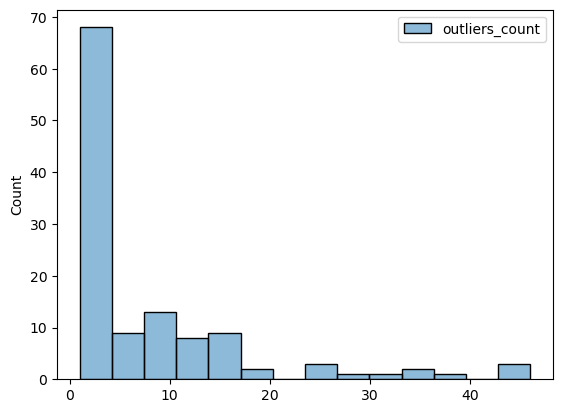

In [52]:
find_outliers(df)

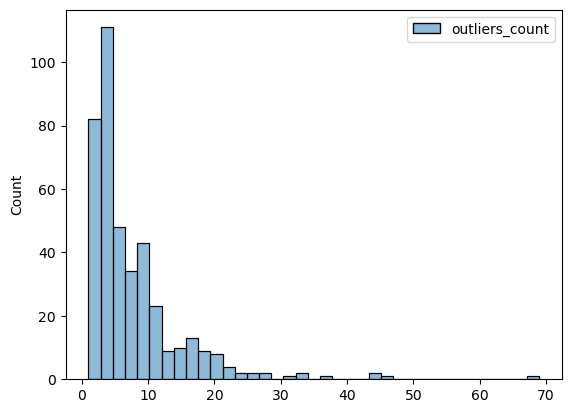

In [53]:
find_outliers(data_nan_imputer_knn)

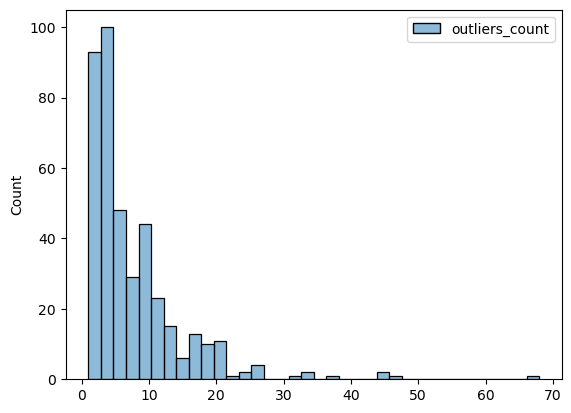

In [54]:
find_outliers(data_nan_imputer_lightbm)

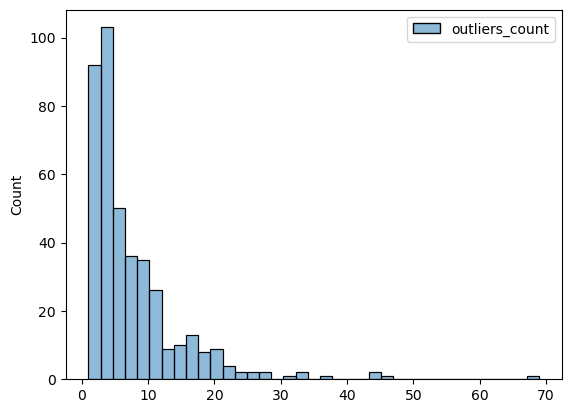

In [55]:
find_outliers(data_nan_imputer_mice)

##### Insight:
1 .Compare with original distribution noise is increased 3 imputers 

In [112]:
def get_high_skew_columns(df_exp):
    
    # Identifying columns with high skewness
    # df_exp.drop(columns='Good/Bad',inplace=True)
    high_skew_columns = df_exp.columns[(df_exp.skew() < -1) | (df_exp.skew() > 1)]
    
    high_skew_columns = high_skew_columns.tolist()
    # Getting the length of the identified columns
    high_skew_columns.remove('Good/Bad')
    length = len(high_skew_columns)
    
    
    print(f"Length: {length}")
    return high_skew_columns


In [73]:
get_high_skew_columns(df_exp)

Length: 284


In [74]:
get_high_skew_columns(data_nan_imputer_knn)

Length: 283


In [75]:
get_high_skew_columns(data_nan_imputer_lightbm)

Length: 284


In [76]:
get_high_skew_columns(data_nan_imputer_mice)

Length: 293


##### Insight:  compare with original and other imputers MICE imputer increase skewness in 10 more feautres

In [98]:
dt = df_exp.copy()

high_skewed_columns = get_high_skew_columns(dt.drop(columns=['Good/Bad']))
high_skewed_columns

Length: 21


C:\Users\RAVEEN\anaconda3\Lib\site-packages\pandas\core\nanops.py:1260: RuntimeWarning: overflow encountered in multiply
  adjusted3 = adjusted2 * adjusted
C:\Users\RAVEEN\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\RAVEEN\anaconda3\Lib\site-packages\pandas\core\nanops.py:1272: RuntimeWarning: overflow encountered in power
  result = (count * (count - 1) ** 0.5 / (count - 2)) * (m3 / m2**1.5)


Index(['Sensor-5', 'Sensor-28', 'Sensor-41', 'Sensor-75', 'Sensor-115',
       'Sensor-141', 'Sensor-207', 'Sensor-210', 'Sensor-223', 'Sensor-250',
       'Sensor-252', 'Sensor-276', 'Sensor-341', 'Sensor-343', 'Sensor-348',
       'Sensor-361', 'Sensor-388', 'Sensor-390', 'Sensor-479', 'Sensor-522',
       'Sensor-524'],
      dtype='object')

In [212]:
## remove outliers
from sklearn.preprocessing import PowerTransformer
def remove_skewness(df):
    dt = df.copy()
    if 'is_nan' in dt.columns.to_list():
        dt.drop(columns=['is_nan'],inplace=True)
    
    high_skewed_columns = get_high_skew_columns(dt)
    # print(high_skewed_columns)
    pw_transformation = PowerTransformer()
    data = pw_transformation.fit_transform(df[high_skewed_columns])
    dt[high_skewed_columns] = data

    return dt
    
    

In [127]:
remove_skew_orginal_df = remove_skewness(df)

Length: 282


In [213]:
remove_skew_knn_df = remove_skewness(data_nan_imputer_knn)

Length: 282


In [214]:
remove_skew_mice_df = remove_skewness(data_nan_imputer_mice)

Length: 292


In [130]:
data_nan_imputer_lightbm['Good/Bad'] = df['Good/Bad']

In [133]:
remove_skew_lightgbm_df = remove_skewness(data_nan_imputer_lightbm)

Length: 21


C:\Users\RAVEEN\anaconda3\Lib\site-packages\pandas\core\nanops.py:1260: RuntimeWarning: overflow encountered in multiply
  adjusted3 = adjusted2 * adjusted
C:\Users\RAVEEN\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\RAVEEN\anaconda3\Lib\site-packages\pandas\core\nanops.py:1272: RuntimeWarning: overflow encountered in power
  result = (count * (count - 1) ** 0.5 / (count - 2)) * (m3 / m2**1.5)
C:\Users\RAVEEN\anaconda3\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [136]:
def check_inf(df):
    # Check for positive infinity
    contains_pos_inf = (df == np.inf).any().any()
    
    # Check for negative infinity
    contains_neg_inf = (df == -np.inf).any().any()
    
    print(f"Contains positive infinity: {contains_pos_inf}")
    print(f"Contains negative infinity: {contains_neg_inf}")
    

In [137]:
check_inf(data_nan_imputer_lightbm)

Contains positive infinity: False
Contains negative infinity: False


In [140]:
def find_std_var(df_exp):
    # Calculate standard deviation and variance for each column
    std_dev = df_exp.std()
    variance = df_exp.var()
    mean = df.mean()
    print('mean :')
    print(mean)
    print("Standard Deviation:")
    print(std_dev)
    print("\nVariance:")
    print(variance)



In [141]:
find_std_var(data_nan_imputer_knn)

mean :
Sensor-1      3020.762560
Sensor-2      2495.829916
Sensor-3      2200.208587
Sensor-4      1474.891287
Sensor-5         6.792812
                 ...     
Sensor-587       0.023074
Sensor-588       0.015922
Sensor-589       0.005121
Sensor-590      91.393672
Good/Bad        -0.911589
Length: 455, dtype: float64
Standard Deviation:
Sensor-1       80.063265
Sensor-2       71.527424
Sensor-3       30.720488
Sensor-4      529.168427
Sensor-5       77.060552
                 ...    
Sensor-587      0.013394
Sensor-588      0.009087
Sensor-589      0.003061
Sensor-590     89.302699
Good/Bad        0.411349
Length: 455, dtype: float64

Variance:
Sensor-1        6410.126423
Sensor-2        5116.172434
Sensor-3         943.748413
Sensor-4      280019.224380
Sensor-5        5938.328716
                  ...      
Sensor-587         0.000179
Sensor-588         0.000083
Sensor-589         0.000009
Sensor-590      7974.972054
Good/Bad           0.169208
Length: 455, dtype: float64


In [152]:
find_outliers(df_exp)

Total number of columns Outliers Contains: 360


In [153]:
find_outliers(remove_skew_orginal_df)

Total number of columns Outliers Contains: 104


In [154]:
find_outliers(data_nan_imputer_knn)

Total number of columns Outliers Contains: 408


In [155]:
find_outliers(remove_skew_knn_df)

Total number of columns Outliers Contains: 361


In [156]:
find_outliers(data_nan_imputer_lightbm)

Total number of columns Outliers Contains: 360


In [157]:
find_outliers(remove_skew_lightgbm_df)

Total number of columns Outliers Contains: 356


In [158]:
find_outliers(data_nan_imputer_lightbm)

Total number of columns Outliers Contains: 409


In [159]:
find_outliers(remove_skew_mice_df)

Total number of columns Outliers Contains: 362


#####  Compare with other imputers LightGBM produce less outliers and after removing skewness  it remove outliers from 4 columns

In [230]:
def remove_outliers(df):
    for column in df.columns:
        if column !="Good/Bad":
            lower_bound = df[column].quantile(0.25)
            upper_bound = df[column].quantile(0.74)
            IQR = upper_bound-lower_bound
            lower_limit = lower_bound - (IQR*1.5)
            upper_limit = upper_bound + (IQR*1.5)
            # Remove outliers
            df_cleaned = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
        
    print(f'original_df :{df.shape}')
    print(f'remove_outliers_df: {df_cleaned.shape}')
    print(f'No of records removed: {df.shape[0]-df_cleaned.shape[0]}')
    print(f'No of records removed in percentage: {(df.shape[0]-df_cleaned.shape[0]/df.shape[0])/100}')
    return df_cleaned

In [163]:
remove_outliers(data_nan_imputer_knn)

original_df :(837, 455)
remove_outliers_df: (800, 455)


In [164]:
remove_outliers(remove_skew_knn_df)

original_df :(837, 455)
remove_outliers_df: (800, 455)


In [165]:
remove_outliers(data_nan_imputer_mice)

original_df :(837, 455)
remove_outliers_df: (800, 455)


In [166]:
remove_outliers(remove_skew_mice_df)

original_df :(837, 455)
remove_outliers_df: (800, 455)


In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [266]:
def experiment(df):
    result_dict = {}
    X = df.drop(columns=['Good/Bad'])
    y = df['Good/Bad']
    y = np.where(df['Good/Bad']==-1,1,0)
    # scalar = StandardScaler()
    # x_scaled = scalar.fit_transform(X)

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=100)
    
    print("Using logistcregression")
    lg = LogisticRegression()
    lg.fit(X_train,y_train)
    result_dict['LogisticRegression'] = {'training_score':lg.score(X_train,y_train),'test_score':lg.score(X_test,y_test)}
    
   
    
    print("Using DecisionTree")
    model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    result_dict['DecisionTree'] = {'training_score':lg.score(X_train,y_train),'test_score':lg.score(X_test,y_test)}

    print("Using Randomforest")
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    result_dict['Randomforest'] = {'training_score':lg.score(X_train,y_train),'test_score':lg.score(X_test,y_test)}

    print("Using svc")
    model = SVC()
    model.fit(X_train,y_train)
    result_dict['SVC'] = {'training_score':lg.score(X_train,y_train),'test_score':lg.score(X_test,y_test)}

    print("Using KNeighborsClassifier")
    model = KNeighborsClassifier()
    model.fit(X_train,y_train)
    result_dict['KNN'] = {'training_score':lg.score(X_train,y_train),'test_score':lg.score(X_test,y_test)}

    print("Using GaussianNB")
    model = GaussianNB()
    model.fit(X_train,y_train)
    result_dict['GaussianNB'] = {'training_score':lg.score(X_train,y_train),'test_score':lg.score(X_test,y_test)}


    print("Using XGBClassifier")
    model = XGBClassifier()
    model.fit(X_train,y_train)
    result_dict['XGBClassifier'] = {'training_score':lg.score(X_train,y_train),'test_score':lg.score(X_test,y_test)}


    return pd.DataFrame(result_dict)
    

In [207]:
experiment(data_nan_imputer_knn)

Using logistcregression
Training score :0.9633173843700159
Test Score:0.9428571428571428
--------------------------------------------------
Using DecisionTree


C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training score :1.0
Test Score:0.9
--------------------------------------------------
Using Randomforest
Training score :1.0
Test Score:0.9428571428571428
--------------------------------------------------
Using svc
Training score :0.960127591706539
Test Score:0.9428571428571428
--------------------------------------------------
Using KNeighborsClassifier
Training score :0.9569377990430622
Test Score:0.9380952380952381
--------------------------------------------------
Using GaussianNB
Training score :0.20893141945773525
Test Score:0.19523809523809524
--------------------------------------------------
Using XGBClassifier
Training score :1.0
Test Score:0.9428571428571428
--------------------------------------------------


In [208]:
experiment(remove_skew_knn_df)

Using logistcregression
Training score :0.03987240829346093
Test Score:0.05714285714285714
--------------------------------------------------
Using DecisionTree


C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\RAVEEN\anaconda3\Lib\site-packages\pandas\core\generic.py:2153: RuntimeWarning: overflow encountered in cast
  arr = np.asarray(values, dtype=dtype)


ValueError: Input X contains infinity or a value too large for dtype('float32').

In [205]:
experiment(data_nan_imputer_mice)

Using logistcregression
Training score :0.9537480063795853
Test Score:0.9428571428571428
--------------------------------------------------
Using DecisionTree


C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training score :1.0
Test Score:0.9380952380952381
--------------------------------------------------
Using Randomforest
Training score :0.9984051036682615
Test Score:0.9666666666666667
--------------------------------------------------
Using svc
Training score :0.9521531100478469
Test Score:0.9666666666666667
--------------------------------------------------
Using KNeighborsClassifier
Training score :0.9521531100478469
Test Score:0.9666666666666667
--------------------------------------------------
Using GaussianNB
Training score :0.22328548644338117
Test Score:0.15714285714285714
--------------------------------------------------
Using XGBClassifier
Training score :1.0
Test Score:0.9666666666666667
--------------------------------------------------


In [206]:
experiment(remove_skew_mice_df)

Using logistcregression
Training score :0.046251993620414676
Test Score:0.0380952380952381
--------------------------------------------------
Using DecisionTree


C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\RAVEEN\anaconda3\Lib\site-packages\pandas\core\generic.py:2153: RuntimeWarning: overflow encountered in cast
  arr = np.asarray(values, dtype=dtype)


ValueError: Input X contains infinity or a value too large for dtype('float32').

In [ ]:
The repeated "No further splits with positive gain, best gain: -inf" warnings from LightGBM indicate that the model is unable to find any splits in the decision trees that improve the model’s predictive powe

In [185]:
data_nan_imputer_lightbm.values

array([[ 3.04598000e+03,  2.54485000e+03,  2.25334440e+03, ...,
         4.03442236e+00, -1.00000000e+00, -0.00000000e+00],
       [ 3.15198000e+03,  2.56375000e+03,  2.17525560e+03, ...,
         4.03442236e+00, -1.00000000e+00, -0.00000000e+00],
       [ 3.07118000e+03,  2.48986000e+03,  2.19530000e+03, ...,
         4.03442236e+00, -1.00000000e+00, -0.00000000e+00],
       ...,
       [ 3.00343000e+03,  2.44834000e+03,  2.20550000e+03, ...,
         4.97500313e+00, -1.00000000e+00, -0.00000000e+00],
       [ 2.95363000e+03,  2.50005000e+03,  2.19597780e+03, ...,
         6.11186323e+00, -1.00000000e+00, -0.00000000e+00],
       [ 3.03474000e+03,  2.45890000e+03,  2.19218890e+03, ...,
         7.20488667e+00, -1.00000000e+00, -0.00000000e+00]])

In [186]:
# Check for infinite values
if np.any(np.isinf(data_nan_imputer_lightbm.values)):
    print("Data contains infinity values.")

In [188]:
data_nan_imputer_lightbm = data_nan_imputer_lightbm.astype('float64').drop(columns=['is_nan'])
data_nan_imputer_lightbm

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-578,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,3045.98,2544.85,2253.3444,34.295109,0.963175,94.9722,11587.797796,1.4752,0.0084,0.0009,...,0.834638,0.4948,0.007389,0.001969,0.626219,0.021682,0.007645,0.002427,4.034422,-1.0
1,3151.98,2563.75,2175.2556,27.448703,1.042503,100.6222,18031.427817,1.4536,-0.0110,-0.0035,...,0.815290,0.5063,0.007048,0.001903,0.610013,0.021682,0.007645,0.002427,4.034422,-1.0
2,3071.18,2489.86,2195.3000,28.689894,0.784725,103.5467,14780.924974,1.4826,0.0136,0.0009,...,0.834638,0.5033,0.007012,0.001832,0.610265,0.021682,0.007645,0.002427,4.034422,-1.0
3,2958.46,2523.78,2171.8556,28.733821,1.123401,100.1367,16690.692135,1.4645,0.0001,0.0067,...,0.834638,0.4954,0.007789,0.001969,0.640904,0.021682,0.007645,0.002427,4.034422,-1.0
4,3196.21,2413.39,2255.5222,33.542016,1.000569,101.5878,10372.573811,1.4845,-0.0037,0.0049,...,0.867462,0.5058,0.006308,0.001716,0.581075,0.005009,0.011324,0.003428,7.144001,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,3169.00,2265.60,2187.9889,28.171121,0.773192,97.6567,13088.116954,1.4109,-0.0239,-0.0121,...,0.868965,0.4912,0.007518,0.002143,0.631921,0.013971,0.008674,0.002579,4.975003,-1.0
833,2923.19,2516.40,2180.8889,28.059846,0.774683,94.2467,13832.309435,1.3137,0.0345,-0.0137,...,0.807005,0.4939,0.008484,0.002089,0.664021,0.013971,0.008674,0.002579,4.975003,-1.0
834,3003.43,2448.34,2205.5000,29.891691,1.730515,111.7644,16326.126067,1.4339,0.0020,-0.0036,...,0.831834,0.4966,0.005864,0.001444,0.563243,0.013971,0.008674,0.002579,4.975003,-1.0
835,2953.63,2500.05,2195.9778,30.733074,1.227865,103.2400,15111.253753,1.5177,0.0183,-0.0137,...,0.807209,0.5009,0.007760,0.002031,0.638513,0.014803,0.014110,0.004456,6.111863,-1.0


In [193]:
def nan_imputer_lightbm(data):
    for col in data.columns:
        if data[col].isnull().sum() > 0:
            print(col)
            nan_idxs = np.where(data[col].isna())[0]
            data['is_nan'] = 0
            data.loc[nan_idxs, 'is_nan'] = 1
            train_df = data[data['is_nan'] == 0]
            test_df = data[data['is_nan'] == 1]
            X_train = train_df.drop(columns=[col, 'is_nan'])
            y_train = train_df[col]
            x_test = test_df.drop(columns=[col, 'is_nan'])
        
            model = LGBMRegressor()
            model.fit(X_train, y_train)
            y_pred = model.predict(x_test)
        
            # Ensure predictions do not introduce inf or very large values
            y_pred = np.nan_to_num(y_pred, nan=0.0, posinf=1e10, neginf=-1e10)
            data.loc[nan_idxs, col] = y_pred
            print(data[col].isnull().sum())

    return data


In [195]:
data_nan_imputer_lightbm_ = nan_imputer_lightbm(df)

Sensor-1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90204
[LightGBM] [Info] Number of data points in the train set: 836, number of used features: 444
[LightGBM] [Info] Start training from score 3020.762559
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
0
Sensor-2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009429 seconds.
You ca

The repeated "No further splits with positive gain, best gain: -inf" warnings from LightGBM indicate that the model is unable to find any splits in the decision trees that improve the model’s predictive powe

Mice and LightGBM imputer may not work for this data it doen't learn any thing from the datase so it it not usefull

In [ ]:
go for knn_imputer and skewed removed dataset

In [209]:
experiment(data_nan_imputer_mice)

Using logistcregression
Training score :0.9553429027113237
Test Score:0.9619047619047619
--------------------------------------------------
Using DecisionTree


C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training score :1.0
Test Score:0.9333333333333333
--------------------------------------------------
Using Randomforest
Training score :1.0
Test Score:0.9714285714285714
--------------------------------------------------
Using svc
Training score :0.9505582137161085
Test Score:0.9714285714285714
--------------------------------------------------
Using KNeighborsClassifier
Training score :0.9505582137161085
Test Score:0.9714285714285714
--------------------------------------------------
Using GaussianNB
Training score :0.2759170653907496
Test Score:0.2523809523809524
--------------------------------------------------
Using XGBClassifier
Training score :1.0
Test Score:0.9666666666666667
--------------------------------------------------


In [211]:
experiment(data_nan_imputer_knn)

Using logistcregression
Training score :0.94896331738437
Test Score:0.9761904761904762
--------------------------------------------------
Using DecisionTree


C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training score :1.0
Test Score:0.9571428571428572
--------------------------------------------------
Using Randomforest
Training score :1.0
Test Score:0.9809523809523809
--------------------------------------------------
Using svc
Training score :0.9473684210526315
Test Score:0.9809523809523809
--------------------------------------------------
Using KNeighborsClassifier
Training score :0.9473684210526315
Test Score:0.9761904761904762
--------------------------------------------------
Using GaussianNB
Training score :0.2631578947368421
Test Score:0.22380952380952382
--------------------------------------------------
Using XGBClassifier
Training score :1.0
Test Score:0.9809523809523809
--------------------------------------------------


In [216]:
experiment(remove_skew_knn_df)

Using logistcregression
Training score :0.9569377990430622
Test Score:0.9476190476190476
--------------------------------------------------
Using DecisionTree


C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training score :1.0
Test Score:0.9333333333333333
--------------------------------------------------
Using Randomforest
Training score :1.0
Test Score:0.9523809523809523
--------------------------------------------------
Using svc
Training score :0.9569377990430622
Test Score:0.9523809523809523
--------------------------------------------------
Using KNeighborsClassifier
Training score :0.9553429027113237
Test Score:0.9523809523809523
--------------------------------------------------
Using GaussianNB
Training score :0.5311004784688995
Test Score:0.47619047619047616
--------------------------------------------------
Using XGBClassifier
Training score :1.0
Test Score:0.9476190476190476
--------------------------------------------------


In [217]:
experiment(remove_skew_mice_df)

Using logistcregression
Training score :0.9569377990430622
Test Score:0.9380952380952381
--------------------------------------------------
Using DecisionTree


C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training score :1.0
Test Score:0.9047619047619048
--------------------------------------------------
Using Randomforest
Training score :1.0
Test Score:0.9476190476190476
--------------------------------------------------
Using svc
Training score :0.9585326953748007
Test Score:0.9476190476190476
--------------------------------------------------
Using KNeighborsClassifier
Training score :0.9585326953748007
Test Score:0.9476190476190476
--------------------------------------------------
Using GaussianNB
Training score :0.5598086124401914
Test Score:0.46190476190476193
--------------------------------------------------
Using XGBClassifier
Training score :1.0
Test Score:0.9476190476190476
--------------------------------------------------


In [231]:
removed_outleris_knn_df =  remove_outliers(data_nan_imputer_knn)


original_df :(837, 455)
remove_outliers_df: (768, 455)
No of records removed: 69
No of records removed in percentage: 8.360824372759856


In [267]:
result_knn = experiment(removed_outleris_knn_df) 
result_knn_non_skew = experiment(remove_skew_knn_df)
removed_outleris_knn_non_skew_df =  remove_outliers(remove_skew_knn_df)
result_knn_non_skew_outliers = experiment(removed_outleris_knn_non_skew_df)

Using logistcregression
Using DecisionTree


C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Using Randomforest
Using svc
Using KNeighborsClassifier
Using GaussianNB
Using XGBClassifier
Using logistcregression
Using DecisionTree


C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Using Randomforest
Using svc
Using KNeighborsClassifier
Using GaussianNB
Using XGBClassifier
original_df :(837, 455)
remove_outliers_df: (809, 455)
No of records removed: 28
No of records removed in percentage: 8.360334528076462
Using logistcregression
Using DecisionTree


C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Using Randomforest
Using svc
Using KNeighborsClassifier
Using GaussianNB
Using XGBClassifier


In [268]:
exp1 = pd.concat([result_knn,result_knn_non_skew,result_knn_non_skew_outliers]).T
exp1

,training_score,test_score,training_score,test_score,training_score,test_score
LogisticRegression,0.961806,0.953125,0.960128,0.938095,0.957096,0.950739
DecisionTree,0.961806,0.953125,0.960128,0.938095,0.957096,0.950739
Randomforest,0.961806,0.953125,0.960128,0.938095,0.957096,0.950739
SVC,0.961806,0.953125,0.960128,0.938095,0.957096,0.950739
KNN,0.961806,0.953125,0.960128,0.938095,0.957096,0.950739
GaussianNB,0.961806,0.953125,0.960128,0.938095,0.957096,0.950739
XGBClassifier,0.961806,0.953125,0.960128,0.938095,0.957096,0.950739


In [272]:
result_mice = experiment(remove_outliers(data_nan_imputer_mice))
result_mice_non_skew = experiment(remove_skew_knn_df)
removed_outleris_mice_non_skew_df =  remove_outliers(remove_skew_mice_df)
result_mice_non_skew_outliers = experiment(removed_outleris_mice_non_skew_df)

original_df :(837, 455)
remove_outliers_df: (768, 455)
No of records removed: 69
No of records removed in percentage: 8.360824372759856
Using logistcregression
Using DecisionTree


C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Using Randomforest
Using svc
Using KNeighborsClassifier
Using GaussianNB
Using XGBClassifier
Using logistcregression
Using DecisionTree


C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Using Randomforest
Using svc
Using KNeighborsClassifier
Using GaussianNB
Using XGBClassifier
original_df :(837, 455)
remove_outliers_df: (809, 455)
No of records removed: 28
No of records removed in percentage: 8.360334528076462
Using logistcregression
Using DecisionTree


C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Using Randomforest
Using svc
Using KNeighborsClassifier
Using GaussianNB
Using XGBClassifier


In [273]:
exp2 = pd.concat([result_mice,result_mice_non_skew,result_mice_non_skew_outliers]).T
exp2

,training_score,test_score,training_score,test_score,training_score,test_score
LogisticRegression,0.960069,0.942708,0.960128,0.938095,0.957096,0.950739
DecisionTree,0.960069,0.942708,0.960128,0.938095,0.957096,0.950739
Randomforest,0.960069,0.942708,0.960128,0.938095,0.957096,0.950739
SVC,0.960069,0.942708,0.960128,0.938095,0.957096,0.950739
KNN,0.960069,0.942708,0.960128,0.938095,0.957096,0.950739
GaussianNB,0.960069,0.942708,0.960128,0.938095,0.957096,0.950739
XGBClassifier,0.960069,0.942708,0.960128,0.938095,0.957096,0.950739


In [271]:
exp1

,training_score,test_score,training_score,test_score,training_score,test_score
LogisticRegression,0.961806,0.953125,0.960128,0.938095,0.957096,0.950739
DecisionTree,0.961806,0.953125,0.960128,0.938095,0.957096,0.950739
Randomforest,0.961806,0.953125,0.960128,0.938095,0.957096,0.950739
SVC,0.961806,0.953125,0.960128,0.938095,0.957096,0.950739
KNN,0.961806,0.953125,0.960128,0.938095,0.957096,0.950739
GaussianNB,0.961806,0.953125,0.960128,0.938095,0.957096,0.950739
XGBClassifier,0.961806,0.953125,0.960128,0.938095,0.957096,0.950739


In [274]:
from sklearn.decomposition import PCA

In [323]:
def experiment_with_PCA(df):
    result_dict = {}
    X = df.drop(columns=['Good/Bad'])
    y = df['Good/Bad']
    y = np.where(df['Good/Bad']==-1,1,0)
    # scalar = StandardScaler()
    # x_scaled = scalar.fit_transform(X)
    pca  = PCA(n_components=25)
    
    X_ = pca.fit_transform(X)
    
    # Explained variance ratio
    explained_variance = pca.explained_variance_ratio_
    
    # Scree plot
    plt.figure(figsize=(8, 5))
    # plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
    # plt.title('Scree Plot')
    # plt.xlabel('Principal Component')
    # plt.ylabel('Variance Explained')
    # plt.xticks(np.arange(1, len(explained_variance) + 1))
    plt.plot(np.cumsum(explained_variance))
    plt.show()
    plt.show()

    # Get the cumulative explained variance ratio
    cumulative_variance = pca.explained_variance_ratio_.cumsum()
    
    # Define the threshold for the explained variance (e.g., 95%)
    threshold = 0.99
    
    # Find the number of components needed to reach the threshold
    n_components = next(i for i, total_variance in enumerate(cumulative_variance) if total_variance >= threshold) + 1
    
    print(f"Optimal number of components to capture {threshold*100}% variance: {n_components}")
    # return explained_variance
    X_train,X_test,y_train,y_test = train_test_split(X_,y,test_size=0.25)
    
    print("Using logistcregression")
    lg = LogisticRegression()
    lg.fit(X_train,y_train)
    result_dict['LogisticRegression'] = {'training_score':lg.score(X_train,y_train),'test_score':lg.score(X_test,y_test)}
    
   
    
    print("Using DecisionTree")
    model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    result_dict['DecisionTree'] = {'training_score':lg.score(X_train,y_train),'test_score':lg.score(X_test,y_test)}

    print("Using Randomforest")
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    result_dict['Randomforest'] = {'training_score':lg.score(X_train,y_train),'test_score':lg.score(X_test,y_test)}

    print("Using svc")
    model = SVC()
    model.fit(X_train,y_train)
    result_dict['SVC'] = {'training_score':lg.score(X_train,y_train),'test_score':lg.score(X_test,y_test)}

    print("Using KNeighborsClassifier")
    model = KNeighborsClassifier()
    model.fit(X_train,y_train)
    result_dict['KNN'] = {'training_score':lg.score(X_train,y_train),'test_score':lg.score(X_test,y_test)}

    print("Using GaussianNB")
    model = GaussianNB()
    model.fit(X_train,y_train)
    result_dict['GaussianNB'] = {'training_score':lg.score(X_train,y_train),'test_score':lg.score(X_test,y_test)}


    print("Using XGBClassifier")
    model = XGBClassifier()
    model.fit(X_train,y_train)
    result_dict['XGBClassifier'] = {'training_score':lg.score(X_train,y_train),'test_score':lg.score(X_test,y_test)}


    return pd.DataFrame(result_dict)
    

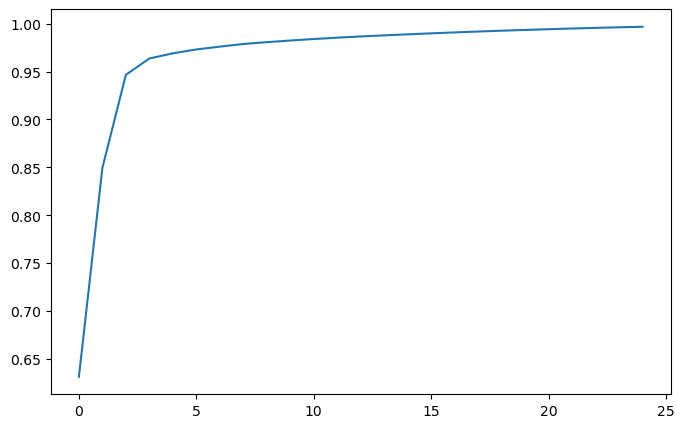

Optimal number of components to capture 99.0% variance: 17
Using logistcregression
Using DecisionTree
Using Randomforest


C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Using svc
Using KNeighborsClassifier
Using GaussianNB
Using XGBClassifier


,LogisticRegression,DecisionTree,Randomforest,SVC,KNN,GaussianNB,XGBClassifier
training_score,0.910686,0.910686,0.910686,0.910686,0.910686,0.910686,0.910686
test_score,0.904762,0.904762,0.904762,0.904762,0.904762,0.904762,0.904762


In [324]:
result_nan_imputer = experiment_with_PCA(data_nan_imputer_knn)
result_nan_imputer

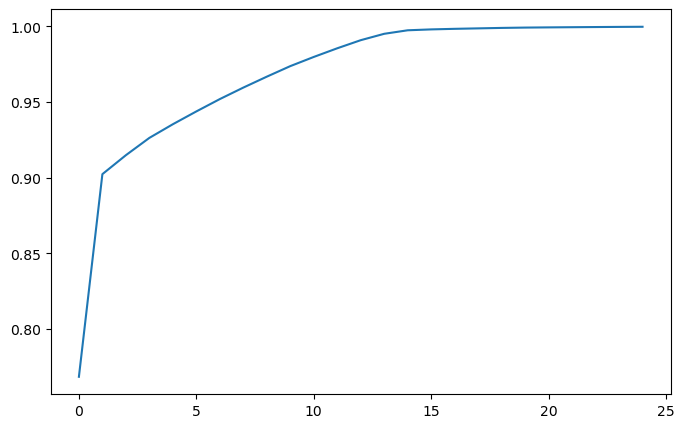

Optimal number of components to capture 99.0% variance: 13
Using logistcregression
Using DecisionTree
Using Randomforest


C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Using svc
Using KNeighborsClassifier
Using GaussianNB
Using XGBClassifier


,LogisticRegression,DecisionTree,Randomforest,SVC,KNN,GaussianNB,XGBClassifier
training_score,0.653907,0.653907,0.653907,0.653907,0.653907,0.653907,0.653907
test_score,0.580952,0.580952,0.580952,0.580952,0.580952,0.580952,0.580952


In [327]:
experiment_with_PCA(remove_skew_knn_df)

In [311]:
n_components

20

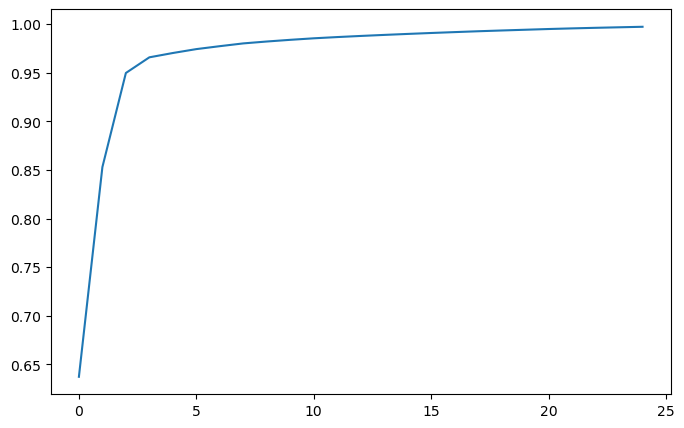

Optimal number of components to capture 99.0% variance: 16
Using logistcregression
Using DecisionTree
Using Randomforest


C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Using svc
Using KNeighborsClassifier
Using GaussianNB
Using XGBClassifier


,LogisticRegression,DecisionTree,Randomforest,SVC,KNN,GaussianNB,XGBClassifier
training_score,0.796875,0.796875,0.796875,0.796875,0.796875,0.796875,0.796875
test_score,0.796875,0.796875,0.796875,0.796875,0.796875,0.796875,0.796875


In [331]:
experiment_with_PCA(removed_outleris_knn_df)

insight: 25 PCA will provide same imformation about 455 columsn which can be usefull and reduce model overfitting and computation time

In [334]:
experiment(removed_outleris_knn_df)

Using logistcregression
Using DecisionTree


C:\Users\RAVEEN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Using Randomforest
Using svc
Using KNeighborsClassifier
Using GaussianNB
Using XGBClassifier


,LogisticRegression,DecisionTree,Randomforest,SVC,KNN,GaussianNB,XGBClassifier
training_score,0.961806,0.961806,0.961806,0.961806,0.961806,0.961806,0.961806
test_score,0.953125,0.953125,0.953125,0.953125,0.953125,0.953125,0.953125


##### Insight:
If PCA drastically reduces model performance, it might not be suitable, especially if feature interpretability is crucial.